# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Common Functions

In [2]:
def highlight_non_numeric(record):
    """
    Takes a record with 8 columns and returns an array indicating style (color) for each column
    the css property `'color: red'` for non-number
    strings, black otherwise.
    """
    output = ['', '', '', '', '', '', '', '', '', '', '']
    if (record['Bare Nuclei'].isnumeric() == False):
        output[6] = 'background-color: #ffff99'
    return output

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [3]:
df_cancer = pd.read_csv("breast-cancer-wisconsin-data.csv")
df_cancer.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [4]:
df_cancer.shape

(699, 11)

In [5]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [6]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [7]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [8]:
# [Beejal] As can be seen all the columns are int64 except Bare Nuclei. Let's find if this column has any non-numeric values.
# Following code will bring forward the rows that have non-numeric value in Bare Nuclei column.
df_corrupt = df_cancer[df_cancer['Bare Nuclei'].apply(lambda x: x.isnumeric() == False)]
df_corrupt.style.apply(highlight_non_numeric, axis=1)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [9]:
## [Beejal] As far as missing values are concerned, the dataframe.info clearly shows there are 699 non-null 
## values in all other columns. So we are fine there.

In [10]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [11]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [12]:
df_cancer['Bare Nuclei'].replace('?', np.nan, inplace=True)

from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(df_cancer[['Bare Nuclei']])
df_cancer["Bare Nuclei"]=imp.transform(df_cancer[['Bare Nuclei']]).ravel()

In [13]:
## [Beejal] Now let's check if the column is corrected

df_cancer.iloc[df_corrupt.index]

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,1057013,8,4,5,1,2,1,7,3,1,4
40,1096800,6,6,6,9,6,1,7,8,1,2
139,1183246,1,1,1,1,1,1,2,1,1,2
145,1184840,1,1,3,1,2,1,2,1,1,2
158,1193683,1,1,2,1,3,1,1,1,1,2
164,1197510,5,1,1,1,2,1,3,1,1,2
235,1241232,3,1,4,1,2,1,3,1,1,2
249,169356,3,1,1,1,2,1,3,1,1,2
275,432809,3,1,3,1,2,1,2,1,1,2
292,563649,8,8,8,1,2,1,6,10,1,4


In [17]:
df_cancer['Bare Nuclei'] = df_cancer['Bare Nuclei'].astype('int64')
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.1 KB


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [18]:
# Check for correlation of variable
df_cancer.drop("ID", axis=1, inplace=True)

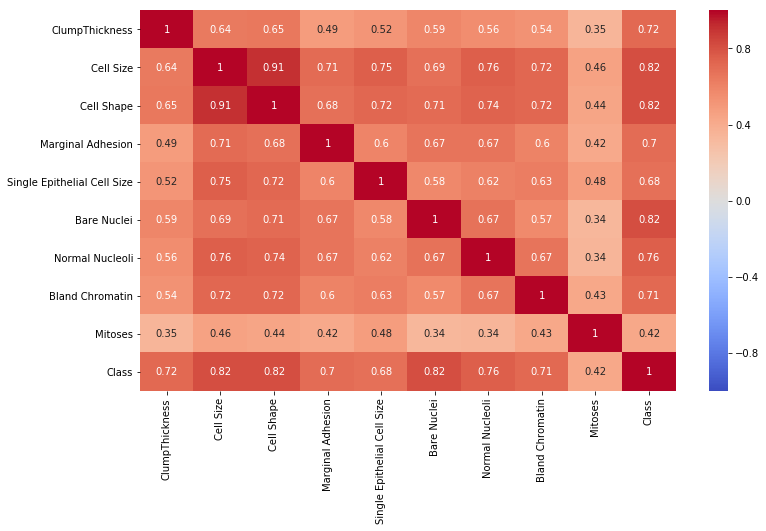

In [21]:
plt.figure(figsize=(12, 7))
sns.heatmap(df_cancer.corr(), cmap='coolwarm', vmin=-1, vmax=1, annot=True)

## Inferences

In [ ]:
# 1. Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# 2. Cell Shape shows high correlation with all except Mitoses
# 3. Target variable shows high correlation with most of these variables

In [ ]:
#Let us check for pair plots

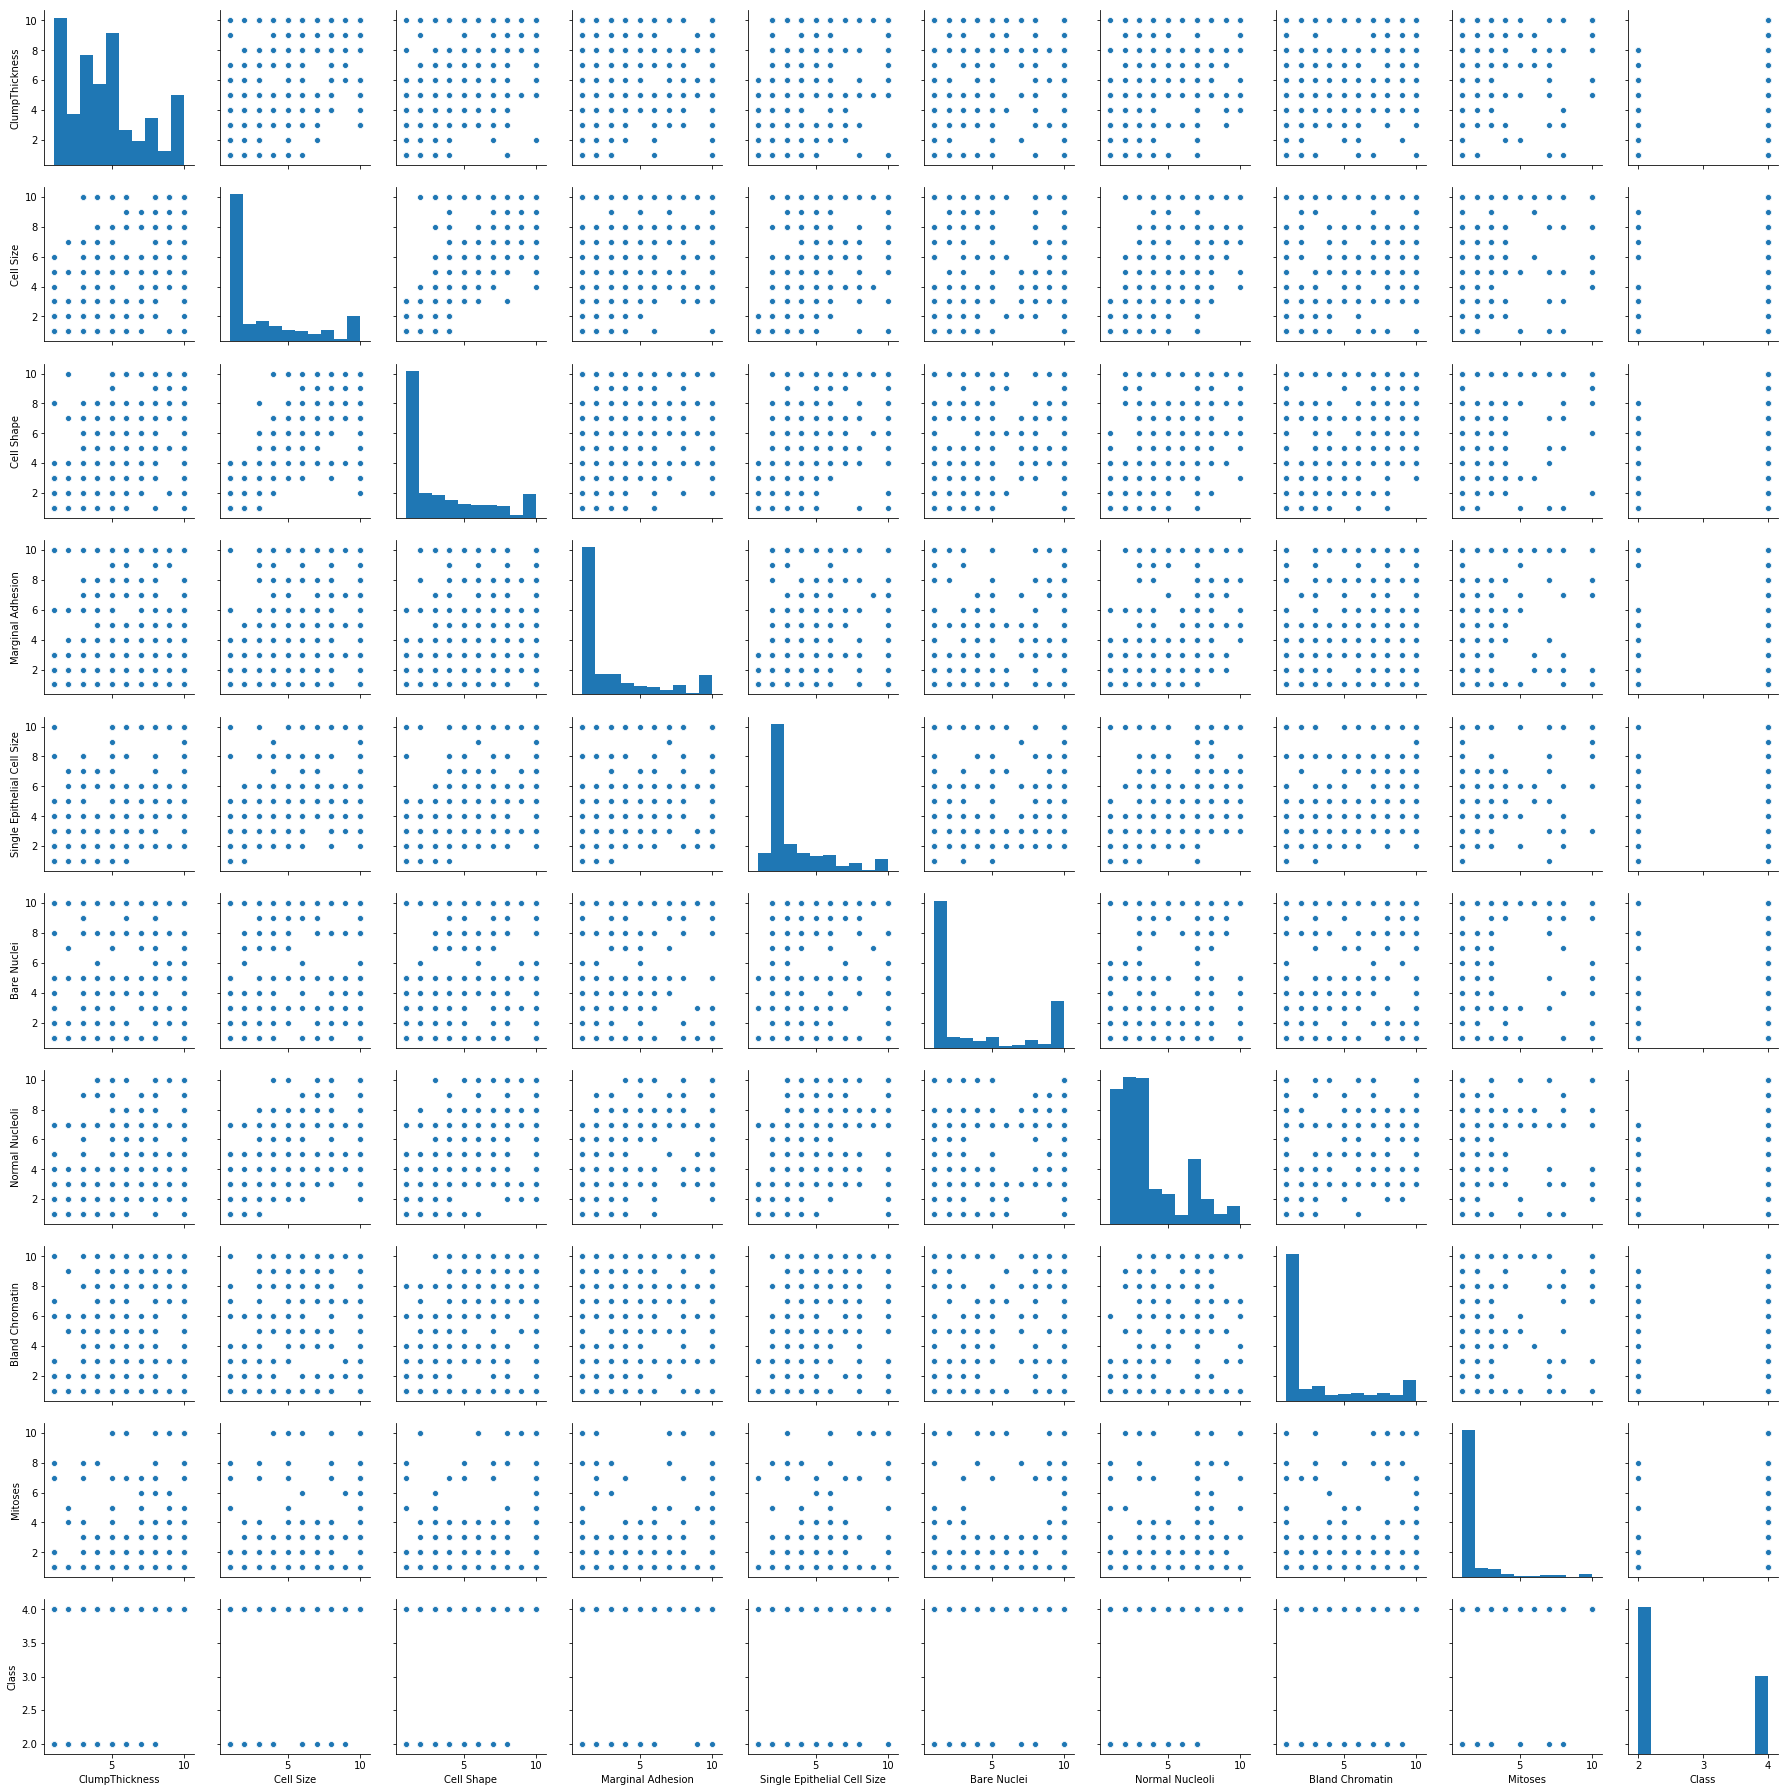

In [22]:
sns.pairplot(df_cancer)

In [ ]:
# Relationship between variables shows some correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [ ]:
# We could see most of the outliers are now removed.

In [33]:
from scipy import stats
z = np.abs(stats.zscore(df_cancer))
df_cancer = df_cancer[(z < 3).all(axis=1)]
df_cancer.shape

(648, 10)

In [ ]:
## [Beejal] After removing outliers (699 - 648 = 51), we lose 51 records (7.2% Records)

# Q6 Create a covariance matrix for identifying Principal components

In [50]:
# PCA
# Step 1 - Create covariance matrix

from sklearn.preprocessing import StandardScaler

stdScaler = StandardScaler()
X_std = pd.DataFrame(stdScaler.fit_transform(df_cancer.iloc[:,0:9]))
X_std.head()


C:\Users\Beejal\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Beejal\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,0,1,2,3,4,5,6,7,8
0,0.304858,-0.642393,-0.693006,-0.588706,-0.509392,-0.632961,-0.099106,-0.564430,-0.331993
1,0.304858,0.440705,0.420386,0.940278,2.569766,1.959335,-0.099106,-0.214429,-0.331993
2,-0.439202,-0.642393,-0.693006,-0.588706,-0.509392,-0.344928,-0.099106,-0.564430,-0.331993
3,0.676887,1.884835,1.904908,-0.588706,0.106440,0.231138,-0.099106,1.535574,-0.331993
4,-0.067172,-0.642393,-0.693006,0.175786,-0.509392,-0.632961,-0.099106,-0.564430,-0.331993


In [51]:
cov_matrix = np.cov(X_std, rowvar=False) # Setting rowvar to false as each row is observation 
                                         # and each column in variable in X_std dataframe

In [52]:
cov_matrix     # Since we had 9 columns, it's a 9*9 matrix. It's like non standard form of correlation matrix

array([[1.0015456 , 0.61818427, 0.62410239, 0.47976788, 0.4926424 ,
        0.57650829, 0.54825598, 0.51849178, 0.36470893],
       [0.61818427, 1.0015456 , 0.90086598, 0.69283943, 0.73308212,
        0.67637148, 0.74671627, 0.73094613, 0.43155367],
       [0.62410239, 0.90086598, 1.0015456 , 0.67104351, 0.70690496,
        0.68962935, 0.73080354, 0.72309852, 0.38961603],
       [0.47976788, 0.69283943, 0.67104351, 1.0015456 , 0.59795509,
        0.68575821, 0.6510195 , 0.59378187, 0.38750453],
       [0.4926424 , 0.73308212, 0.70690496, 0.59795509, 1.0015456 ,
        0.59413265, 0.62686014, 0.66848411, 0.40724077],
       [0.57650829, 0.67637148, 0.68962935, 0.68575821, 0.59413265,
        1.0015456 , 0.65916743, 0.56133266, 0.41411613],
       [0.54825598, 0.74671627, 0.73080354, 0.6510195 , 0.62686014,
        0.65916743, 1.0015456 , 0.66758427, 0.32865685],
       [0.51849178, 0.73094613, 0.72309852, 0.59378187, 0.66848411,
        0.56133266, 0.66758427, 1.0015456 , 0.39706679],


# Q7 Identify eigen values and eigen vector

In [ ]:
# Step 2- Get eigen values and eigen vector

In [53]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [54]:
eigenvalues

array([5.82203615, 0.76965166, 0.56855275, 0.51564015, 0.09661838,
       0.35306537, 0.27645783, 0.31166042, 0.30022764])

In [55]:
eigenvectors

array([[-0.2984365 ,  0.04553224,  0.84403487, -0.28511636, -0.00398401,
         0.06750236, -0.20352908, -0.2349328 ,  0.11826378],
       [-0.38042723, -0.10319707, -0.06832919, -0.14972004, -0.73068373,
         0.00822344,  0.1025499 ,  0.06434122, -0.51857295],
       [-0.37563843, -0.15289024, -0.01034446, -0.14758352,  0.67213995,
         0.01322309,  0.2622203 ,  0.08570831, -0.53439693],
       [-0.33331526, -0.05242438, -0.13776831,  0.60715475,  0.04659558,
        -0.04800634, -0.2987843 , -0.62741542, -0.10553534],
       [-0.33756879, -0.02923589, -0.34940432, -0.24533188,  0.04802847,
         0.73413446, -0.29634573,  0.0652377 ,  0.26378887],
       [-0.33804338,  0.01197799,  0.21917282,  0.53670357, -0.07270728,
         0.21374553,  0.54839392,  0.31393755,  0.31500726],
       [-0.34722517, -0.22947627, -0.03489352,  0.09031837,  0.04732239,
        -0.47404439, -0.50705569,  0.55088921,  0.17279605],
       [-0.33982375, -0.075639  , -0.28656347, -0.38628933, -0

In [89]:
pd.DataFrame(columns=['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses'], data=eigenvectors)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,-0.298436,0.045532,0.844035,-0.285116,-0.003984,0.067502,-0.203529,-0.234933,0.118264
1,-0.380427,-0.103197,-0.068329,-0.149720,-0.730684,0.008223,0.102550,0.064341,-0.518573
2,-0.375638,-0.152890,-0.010344,-0.147584,0.672140,0.013223,0.262220,0.085708,-0.534397
3,-0.333315,-0.052424,-0.137768,0.607155,0.046596,-0.048006,-0.298784,-0.627415,-0.105535
4,-0.337569,-0.029236,-0.349404,-0.245332,0.048028,0.734134,-0.296346,0.065238,0.263789
5,-0.338043,0.011978,0.219173,0.536704,-0.072707,0.213746,0.548394,0.313938,0.315007
6,-0.347225,-0.229476,-0.034894,0.090318,0.047322,-0.474044,-0.507056,0.550889,0.172796
7,-0.339824,-0.075639,-0.286563,-0.386289,-0.019699,-0.408204,0.374848,-0.351075,0.465486
8,-0.223016,0.949618,-0.101945,-0.016108,0.043836,-0.130026,-0.062087,0.100627,-0.070909


# Q8 Find variance and cumulative variance by each eigen vector

In [64]:
eigen_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

eigen_pairs.sort(reverse=True)
eigen_pairs

eigenvalues_sort = [(eigen_pairs[index][0]) for index in range(len(eigen_pairs))]
eigenvectors_sort = [(eigen_pairs[index][1]) for index in range(len(eigen_pairs))]


In [67]:
tot = sum(eigenvalues)

var_explained = [ev/tot for ev in eigenvalues_sort]
var_explained

[0.6458946145142129,
 0.08538488082719817,
 0.06307503925164727,
 0.05720493407734601,
 0.039168945687594464,
 0.03457549623927088,
 0.033307147488044656,
 0.03067013324205171,
 0.010718808672633941]

In [68]:
cum_var_exp = np.cumsum(var_explained)
cum_var_exp

array([0.64589461, 0.7312795 , 0.79435453, 0.85155947, 0.89072841,
       0.92530391, 0.95861106, 0.98928119, 1.        ])

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [69]:
from sklearn.decomposition import PCA

In [72]:
df_cancer.shape

(648, 10)

In [90]:
pca = PCA(n_components=9, random_state=7)
#pca.fit(df_cancer.drop('Class', axis=1))
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=9, random_state=7,
  svd_solver='auto', tol=0.0, whiten=False)

In [91]:
pca.components_

array([[ 0.2984365 ,  0.38042723,  0.37563843,  0.33331526,  0.33756879,
         0.33804338,  0.34722517,  0.33982375,  0.22301564],
       [ 0.04553224, -0.10319707, -0.15289024, -0.05242438, -0.02923589,
         0.01197799, -0.22947627, -0.075639  ,  0.94961814],
       [-0.84403487,  0.06832919,  0.01034446,  0.13776831,  0.34940432,
        -0.21917282,  0.03489352,  0.28656347,  0.10194536],
       [ 0.28511636,  0.14972004,  0.14758352, -0.60715475,  0.24533188,
        -0.53670357, -0.09031837,  0.38628933,  0.01610837],
       [ 0.06750236,  0.00822344,  0.01322309, -0.04800634,  0.73413446,
         0.21374553, -0.47404439, -0.40820448, -0.13002616],
       [-0.2349328 ,  0.06434122,  0.08570831, -0.62741542,  0.0652377 ,
         0.31393755,  0.55088921, -0.35107458,  0.10062672],
       [-0.11826378,  0.51857295,  0.53439693,  0.10553534, -0.26378887,
        -0.31500726, -0.17279605, -0.4654861 ,  0.0709088 ],
       [ 0.20352908, -0.1025499 , -0.2622203 ,  0.2987843 ,  0

In [110]:
df_feature_component = pd.DataFrame(columns=['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses'], data=pca.components_)
df_feature_component

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.298436,0.380427,0.375638,0.333315,0.337569,0.338043,0.347225,0.339824,0.223016
1,0.045532,-0.103197,-0.152890,-0.052424,-0.029236,0.011978,-0.229476,-0.075639,0.949618
2,-0.844035,0.068329,0.010344,0.137768,0.349404,-0.219173,0.034894,0.286563,0.101945
3,0.285116,0.149720,0.147584,-0.607155,0.245332,-0.536704,-0.090318,0.386289,0.016108
4,0.067502,0.008223,0.013223,-0.048006,0.734134,0.213746,-0.474044,-0.408204,-0.130026
5,-0.234933,0.064341,0.085708,-0.627415,0.065238,0.313938,0.550889,-0.351075,0.100627
6,-0.118264,0.518573,0.534397,0.105535,-0.263789,-0.315007,-0.172796,-0.465486,0.070909
7,0.203529,-0.102550,-0.262220,0.298784,0.296346,-0.548394,0.507056,-0.374848,0.062087
8,0.003984,0.730684,-0.672140,-0.046596,-0.048028,0.072707,-0.047322,0.019699,-0.043836


In [97]:
variance_explained = pca.explained_variance_ratio_
variance_explained

array([0.64589461, 0.08538488, 0.06307504, 0.05720493, 0.03916895,
       0.0345755 , 0.03330715, 0.03067013, 0.01071881])

In [99]:
cum_var_exp = np.cumsum(variance_explained)
cum_var_exp

array([0.64589461, 0.7312795 , 0.79435453, 0.85155947, 0.89072841,
       0.92530391, 0.95861106, 0.98928119, 1.        ])

Text(0, 0.5, 'variance')

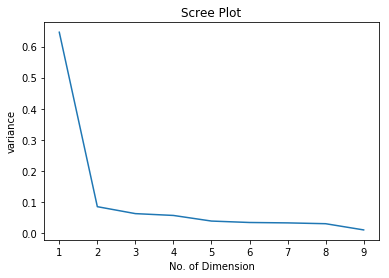

In [98]:
plt.plot(range(1, 10), variance_explained)
plt.title("Scree Plot")
plt.xlabel("No. of Dimension")
plt.ylabel("variance")

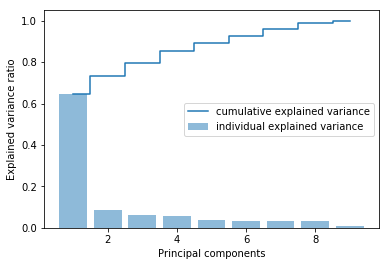

In [102]:
plt.bar(range(1,10), variance_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [ ]:
# [Beejal] I would prefer to go with less loss in variance. Hence, I would select first 4 components as Principal Components. 
# With 4 components, we can cover 85% of variance. Although, this can vary based on the performance of
# the model.

In [109]:
data_cancer_pcaed = pca.transform(X_std)
# Now select the first four columns - which are the values of Principal Component#1 to Principal Component#4
df_cancer_pcaed = pd.DataFrame(df_cancer_pcaed[:,0:4], columns=['Component_1', 'Component_2', 'Component_3', 'Component_4'])
df_cancer_pcaed.head()

,Component_1,Component_2,Component_3,Component_4
0,-1.296129,-0.025530,-0.627783,0.246213
1,2.078452,-0.473131,0.276395,-0.856315
2,-1.420816,-0.055959,-0.062900,-0.120519
3,1.965820,-0.833086,-0.114659,1.612598
4,-1.152340,-0.082548,-0.208454,-0.324024


# Q10 Find correlation between components and features

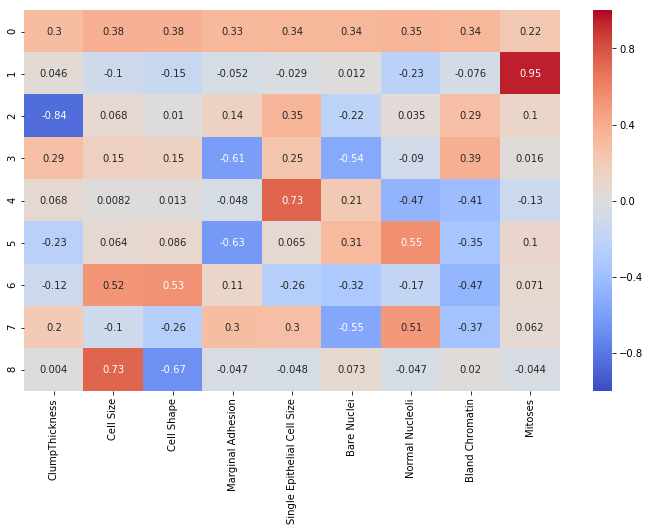

In [112]:
plt.figure(figsize=(12, 7))
sns.heatmap(df_feature_component, cmap='coolwarm', vmin=-1, vmax=1, annot=True)

# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

In [143]:
df_movies = pd.read_csv("movies_metadata.csv")
df_movies.head()

C:\Users\Beejal\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [113]:
df_jokes = pd.read_csv("jokes.csv")
df_jokes.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [121]:
ratings = df_jokes.iloc[0:200, 1:]
print(ratings.shape)
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q22 Change the column indices from 0 to 99

In [122]:
ratings.columns = range(0, 100)
print(ratings.shape)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [123]:
ratings = ratings.replace(99, 0)
print(ratings.shape)
ratings.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [129]:
stdScaler = StandardScaler()
ratings_diff = pd.DataFrame(stdScaler.fit_transform(ratings))
ratings_diff.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-1.857016,1.671649,-2.219181,-1.935298,-1.380394,-2.240830,-1.785253,0.877475,-2.233712,-1.132409,...,0.772232,-0.055329,-0.362193,-0.184043,-0.175922,-0.140401,-1.973424,-0.026858,-0.041444,-0.160954
1,0.789494,-0.180277,1.372710,1.315712,-0.432101,-2.505530,-0.160595,-1.083559,2.200591,1.667223,...,0.772232,-1.619456,-0.453066,2.083674,-0.233389,-0.859977,0.712411,0.070600,-1.367650,0.167461
2,-0.117881,-0.121130,-0.053284,0.181880,1.672963,1.814094,1.578074,1.929134,-0.004146,-0.179172,...,-0.192459,-0.055329,-0.362193,2.435660,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
3,-0.117881,1.581908,-0.053284,0.181880,0.339079,1.560803,-0.532913,1.298139,-0.004146,0.189306,...,-0.192459,-0.055329,-0.362193,-0.031131,-0.175922,-0.140401,-0.233349,-0.026858,-0.041444,-0.160954
4,1.772484,0.819110,-0.988252,-1.216599,0.257903,0.063882,1.223570,0.968206,-0.113390,0.968316,...,1.582983,1.707868,0.975838,1.313343,1.557140,0.380786,0.727864,1.850639,0.511142,0.330133


### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [142]:
ratings_diff.mean().sort_values(ascending=False)[0:10]

98    1.840889e-16
81    1.243450e-16
97    1.198694e-16
20    1.065814e-16
94    1.054712e-16
92    8.770762e-17
47    7.771561e-17
73    7.743806e-17
99    7.549517e-17
49    7.494005e-17
dtype: float64